<a href="https://colab.research.google.com/github/DanieelRC/RNyAP/blob/main/RodriguezCarreonDaniel_DescensoPorGradienteCompleto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rodríguez Carreón Daniel        06 de Noviembre de 2025

In [42]:
# importamos los paquete necesarios
import numpy as np
import nni


# cargamos datos de ejemplo
from data_prep import features, targets, features_test, targets_test

n_records, n_features = features.shape
last_loss = None

# En este ejercicio por propósitos de analizar las salidas utilizaremos la misma semilla para los números aleatorios.
np.random.seed(42)

In [43]:
# Initialize weights.
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
bias = np.zeros(1)

# Definimos la neurona
from nni.models import Neurona
from nni.functions import sigmoid, sigmoid_prime

nodo = Neurona(weights, bias, nni.functions.sigmoid)

In [44]:
# Probemos la exactitud de la red antes de entrenarla
test_out = nodo.forward(features_test)
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Exactitud: {:.3f}".format(accuracy))

Exactitud: 0.475


In [45]:
# número de épocas
epochs = 200

# tasa de aprendizaje
learnrate = 0.5

In [46]:
#TODO (1 punto): Completa el código faltante

# Variable para registrar el rendimiento
History_loss = []

# Algoritmo descenso por gradiente
for e in range(epochs):
    incremento_w = np.zeros(weights.shape)
    # Para todos los renglones de ejemplo, asignar a x la entrada, y a y la salida deseada
    for x, y in zip(features.values, targets):

        # TODO: calcula la predicción de la red
        h = nodo.combinacion_lineal(x)
        output = nodo.forward(x)

        # TODO: calcula el término de error
        error_term = (y-output)*sigmoid_prime(h)

        # TODO: calcula el incremento
        incremento_w += learnrate*error_term*x

    # TODO: Actualiza los pesos de forma normalizada por el número de registros
    weights += incremento_w/n_records
    nodo.weights = weights

    # Ahora calculemos el error en el conjunto de datos de entrenamiento para registro y visualización
    out = nodo.forward(features.values)
    loss = np.mean((out - targets) ** 2)
    History_loss.append(loss)
    if e % (epochs / 10) == 0:
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

Train loss:  0.2627609384996635
Train loss:  0.24128247404777375
Train loss:  0.2280540880354618
Train loss:  0.2193105278798058
Train loss:  0.21337877168621391
Train loss:  0.20928619409324875
Train loss:  0.20640957578762922
Train loss:  0.20434565653674283
Train loss:  0.20283359948145654
Train loss:  0.20170345713834115


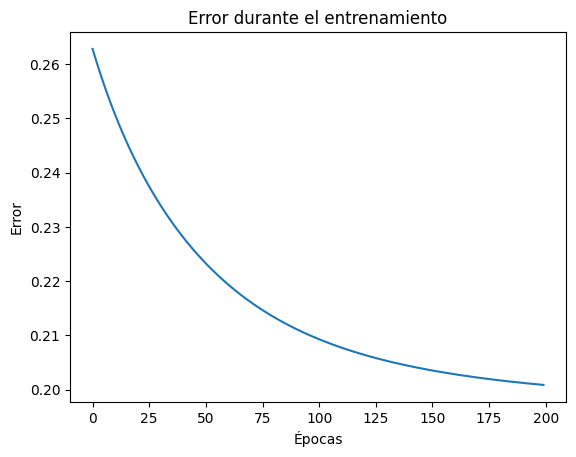

In [47]:
# Grafica el error conforme avanzaron las épocas del entrenamiento.

import matplotlib.pyplot as plt

plt.plot(History_loss)
plt.title("Error durante el entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.show()

In [48]:
# Cálculo de la exactitud

test_out = nodo.forward(features_test)
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.750
